In [1]:
%matplotlib inline
import os, sys
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt

import torch
print(torch.__version__)

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:90% !important; }</style>"))

sys.path.append('..')
import pytorchnet

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

0.4.1


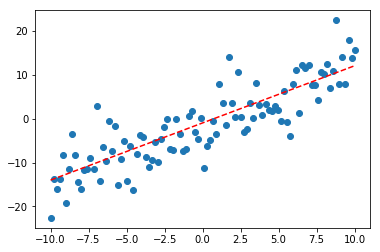

In [2]:
batchSize=100
noiseScale=5.0
m=1.3
b=-1.0
x=np.linspace(-10,10,batchSize)
y=(x*m+b)+np.random.normal(scale=noiseScale,size=(batchSize,))

plt.scatter(x,y)
plt.plot(x,(x*m+b),'r--')

0 7.471137046813965
1000 3.5321455001831055
2000 3.456772565841675
3000 3.439842462539673
4000 3.4342904090881348
5000 3.4272115230560303
6000 3.3643715381622314
7000 3.3401732444763184
8000 3.3282289505004883
9000 3.3175361156463623


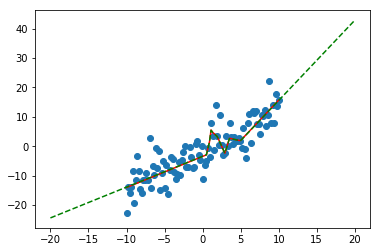

In [9]:
net=pytorchnet.LinearNet(1,1,[10,20,10])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y[:,np.newaxis]).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    pred=net(xt)
    lossval=loss(pred,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y)
plt.plot(x,pred.data.numpy(),'r')

xx=np.linspace(-20,20,200)
plt.plot(xx,net(torch.from_numpy(xx).float()).data.numpy(),'g--')

0 7.471124172210693
1000 3.4819371700286865
2000 3.481276035308838
3000 3.476701259613037
4000 3.47664737701416
5000 3.4736244678497314
6000 3.47300386428833
7000 3.472916603088379
8000 3.471773624420166
9000 3.471238374710083
1.3 -1.0 1.1811788 -2.4499156


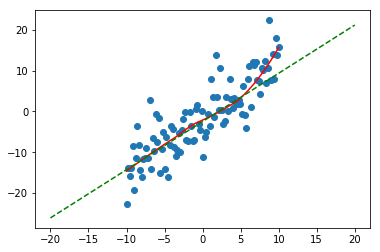

In [8]:
net=pytorchnet.LinearNet(1,2,[10,20,10])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    mbt=net(xt)
    line=xt*mbt[:,0]+mbt[:,1]
    lossval=loss(line,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y)
plt.plot(x,line.data.numpy(),'r')

xx=np.linspace(-20,20,200)
mm,bb=mbt.mean(0).data.numpy() # guessed m and b
plt.plot(xx,(xx*mm+bb),'g--')

print(m,b,mm,bb)